In [27]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

In [28]:
pip install anthropic


Note: you may need to restart the kernel to use updated packages.


In [29]:
ANTHROPIC_API_KEY=""
import os
import anthropic

client = anthropic.Anthropic(
    api_key=ANTHROPIC_API_KEY,
)


In [30]:
from manim import *
from math import *
config.media_width = "75%"
config.verbosity = "WARNING"

import re

In [31]:
def wrap_prompt(prompt: str) -> str:
  """
    Wraps the prompt in the GPT-3.5 instructions
  """
  return f"Animation Request: {prompt}"

In [32]:
def extract_code(text: str) -> str:
  """
    Extracts the code from the text generated by GPT-3.5 from the ``` ``` blocks
  """
  pattern = re.compile(r"```(.*?)```", re.DOTALL)
  match = pattern.search(text)
  if match:
    return match.group(1).strip()
  else:
    return text


In [33]:
def extract_construct_code(code_str: str) -> str:
  """
    Extracts the code from the construct method
  """
  pattern = r"def construct\(self\):([\s\S]*)"
  match = re.search(pattern, code_str)
  if match:
    return match.group(1)
  else:
    return ""

In [34]:
# def generate_manim_code(prompt: str, previous_code: str = None, error_message: str = None) -> str:
#     """
#     Generates Manim code using the Claude model. If an error message and previous code are provided,
#     they are included in the prompt to help refine the generated code.
#     """
#     if error_message and previous_code:
#         CLAUDE_SYSTEM_INSTRUCTIONS = f""" Fix the following error: {error_message} and the code for which it shows error: {previous_code}.  Generate code, not text. Never explain code. Never add functions. Never add comments. Never infinte loops. Never use other library than Manim/math. Only complete the corrected code block. Use variables with length of maximum 2 characters. At the end use 'self.play'. The corrected code is:
# ```
# from manim import *
# from math import *

# class GenScene(Scene):
#     def construct(self):
#         # Write here
# ```"""
#     else:
#         CLAUDE_SYSTEM_INSTRUCTIONS = f"""Write Manim scripts for animations in Python for {prompt}. Generate code, not text. Never explain code. Never add functions. Never add comments. Never infinte loops. Never use other library than Manim/math. Only complete the code block. Use variables with length of maximum 2 characters. At the end use 'self.play'.

# ```
# from manim import *
# from math import *

# class GenScene(Scene):
#     def construct(self):
#         # Write here
# ```"""

#     message = client.messages.create(
#         model="claude-3-opus-20240229",
#         max_tokens=1024,
#         messages=[
#             {"role": "user", "content": CLAUDE_SYSTEM_INSTRUCTIONS}
#         ]
#     )
#     print(message.content[0].text)
#     return extract_code(message.content[0].text)


In [35]:
# def run_manim_code(code: str):
#     """
#     Executes the generated Manim code. If an error occurs, it sends the error
#     message and previous code back to the model for correction.
#     """
#     start_idx = code.find("class GenScene")
#     animation_class_code = code[start_idx:].strip()

#     try:
#         exec(animation_class_code)
#         get_ipython().run_cell_magic('manim', '-qm GenScene', animation_class_code)
#     except Exception as e:
#         error_message = str(e)
#         print("Error occurred:", error_message)
#         corrected_code = generate_manim_code(prompt="Pythagoras Theorem", previous_code=code, error_message=error_message)
#         run_manim_code(corrected_code)

In [36]:
# initial_code = generate_manim_code(prompt="Pythagoras Theorem")
# print(initial_code)


In [37]:
prompt="Pythagoras Theorem"
CLAUDE_SYSTEM_INSTRUCTIONS = f"""Write Manim scripts for animations in Python for {prompt}. Generate code, not text. Never explain code. Never add functions. Never add comments. Never infinte loops. Never use other library than Manim/math. Only complete the code block. Use variables with length of maximum 2 characters. At the end use 'self.play'.

```
from manim import *
from math import *

class GenScene(Scene):
    def construct(self):
        # Write here
```"""

code_response = ""

message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=1024,
    messages=[
        {"role": "user", "content": CLAUDE_SYSTEM_INSTRUCTIONS}
    ]
)

code_response = extract_code(message.content[0].text)


In [38]:
print(code_response)

python
from manim import *
from math import *

class GenScene(Scene):
    def construct(self):
        a = 3
        b = 4
        c = sqrt(a**2 + b**2)
        
        tr = Polygon(ORIGIN, [a,0,0], [a,b,0], [0,b,0])
        lb = Square(side_length=a).next_to(tr, LEFT, buff=0)
        rb = Square(side_length=b).next_to(tr, DOWN, buff=0)
        ls = Line(lb.get_corner(UR), rb.get_corner(DL))
        
        a_tex = MathTex("a").next_to(lb, DOWN)
        b_tex = MathTex("b").next_to(rb, RIGHT)
        c_tex = MathTex("c").move_to(ls.get_center())
        
        self.play(Create(VGroup(tr, lb, rb, ls, a_tex, b_tex, c_tex)))


In [39]:
start_idx = code_response.find("class GenScene")
animationClass = code_response[start_idx:].strip()

print(animationClass)

class GenScene(Scene):
    def construct(self):
        a = 3
        b = 4
        c = sqrt(a**2 + b**2)
        
        tr = Polygon(ORIGIN, [a,0,0], [a,b,0], [0,b,0])
        lb = Square(side_length=a).next_to(tr, LEFT, buff=0)
        rb = Square(side_length=b).next_to(tr, DOWN, buff=0)
        ls = Line(lb.get_corner(UR), rb.get_corner(DL))
        
        a_tex = MathTex("a").next_to(lb, DOWN)
        b_tex = MathTex("b").next_to(rb, RIGHT)
        c_tex = MathTex("c").move_to(ls.get_center())
        
        self.play(Create(VGroup(tr, lb, rb, ls, a_tex, b_tex, c_tex)))


In [46]:
exec(animationClass)


In [50]:
%%manim -qm nm

class nm(Scene):
    def construct(self):
        a = 3
        b = 4
        c = sqrt(a**2 + b**2)
        
        tr = Polygon(ORIGIN, [a,0,0], [a,b,0], [0,b,0])
        lb = Square(side_length=a).next_to(tr, LEFT, buff=0)
        rb = Square(side_length=b).next_to(tr, DOWN, buff=0)
        ls = Line(lb.get_corner(UR), rb.get_corner(DL))
        
        a_tex = MathTex("a").next_to(lb, DOWN)
        b_tex = MathTex("b").next_to(rb, RIGHT)
        c_tex = MathTex("c").move_to(ls.get_center())
        
        self.play(Create(VGroup(tr, lb, rb, ls, a_tex, b_tex, c_tex)))

RuntimeError: latex failed but did not produce a log file. Check your LaTeX installation.

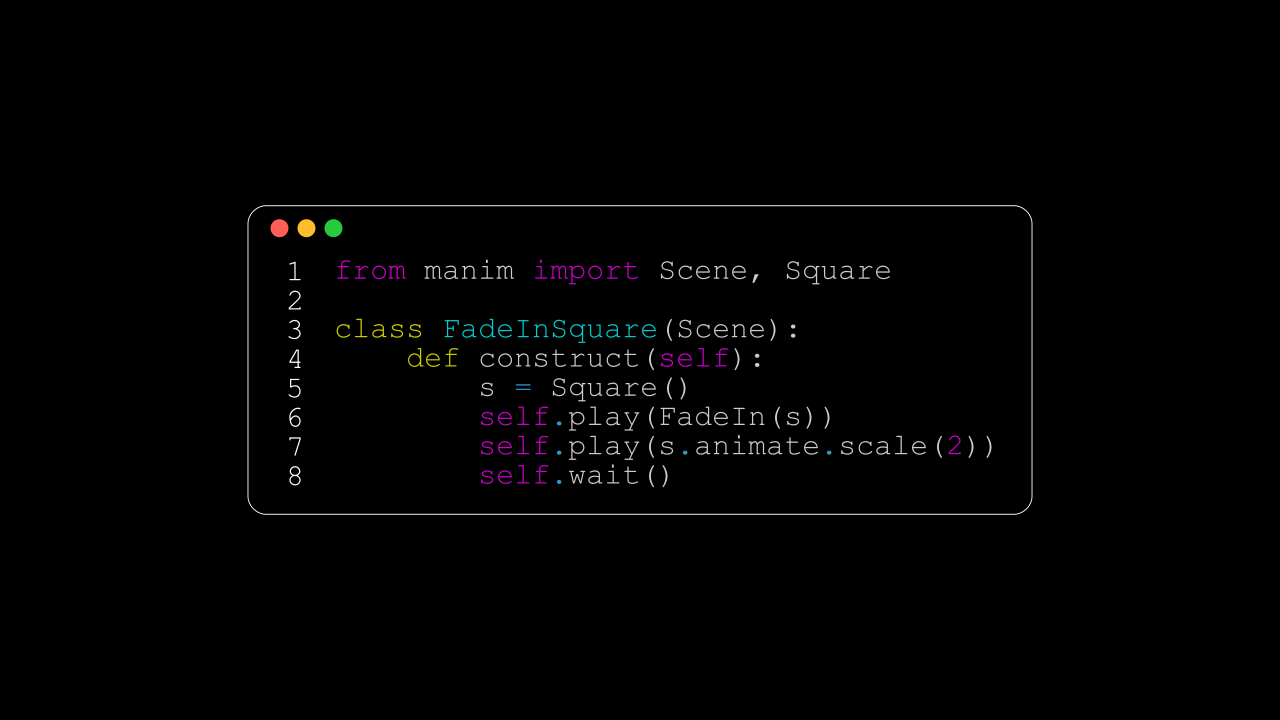

In [53]:
class CodeFromString(Scene):
    def construct(self):
        code = '''from manim import Scene, Square

class FadeInSquare(Scene):
    def construct(self):
        s = Square()
        self.play(FadeIn(s))
        self.play(s.animate.scale(2))
        self.wait()
'''
        rendered_code = Code(code=code, tab_width=4, background="window",
                            language="Python", font="Monospace")
        self.add(rendered_code)



# don't remove below command for run button to work
%manim -qm -v WARNING CodeFromString
